Load required libraries

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# DATA INPUT

Upload data from directory

In [ ]:
uploaded = files.upload()
df = pd.read_csv('DLBCLgenes.csv')


Saving DLBCLgenes.csv to DLBCLgenes.csv


In [ ]:
df

,Unnamed: 0,16351,5562,7797,22416,26648,25671,19758,24931,3522,...,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,...,13.2665,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535
1,1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,...,12.7826,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840
2,2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,...,13.8579,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319
3,3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,...,14.8694,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701
4,4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,...,14.8504,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,...,13.3141,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203
1306,1306,7.5194,7.9761,15.0987,12.7311,10.7386,10.5480,10.2639,13.2170,9.0634,...,14.8201,7.9825,15.0999,11.9393,12.3584,15.4841,8.3209,10.1631,8.6265,12.2641
1307,1307,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,...,14.6072,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371
1308,1308,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,...,14.2247,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853


In [ ]:
uploaded = files.upload()
cl = pd.read_csv('DLBCLtarget.csv')

Saving DLBCLtarget.csv to DLBCLtarget.csv


In [ ]:
cl

,label
0,MHG
1,MHG
2,MHG
3,GCB
4,GCB
...,...
1305,MHG
1306,UNC
1307,GCB
1308,GCB


Processing of data

In [ ]:
#0=UNC, 1=MHG, 2=GCB, 3=ABC
cl = cl.replace({'MHG': 1, 'UNC': 0,'GCB':2, 'ABC':3})
#cl.index = range(1, len(cl) + 1)

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
counts = cl['label'].value_counts()
print(counts)

2    517
3    345
0    278
1    170
Name: label, dtype: int64


In [ ]:
df

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,13.2665,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,12.7826,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,13.8579,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,14.8694,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,14.8504,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,13.3141,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203
1306,7.5194,7.9761,15.0987,12.7311,10.7386,10.5480,10.2639,13.2170,9.0634,12.0775,14.8201,7.9825,15.0999,11.9393,12.3584,15.4841,8.3209,10.1631,8.6265,12.2641
1307,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,14.6072,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371
1308,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,14.2247,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853


#Principal Component Analysis (PCA)

Principal Component Analysis FOR ALL THE DATA

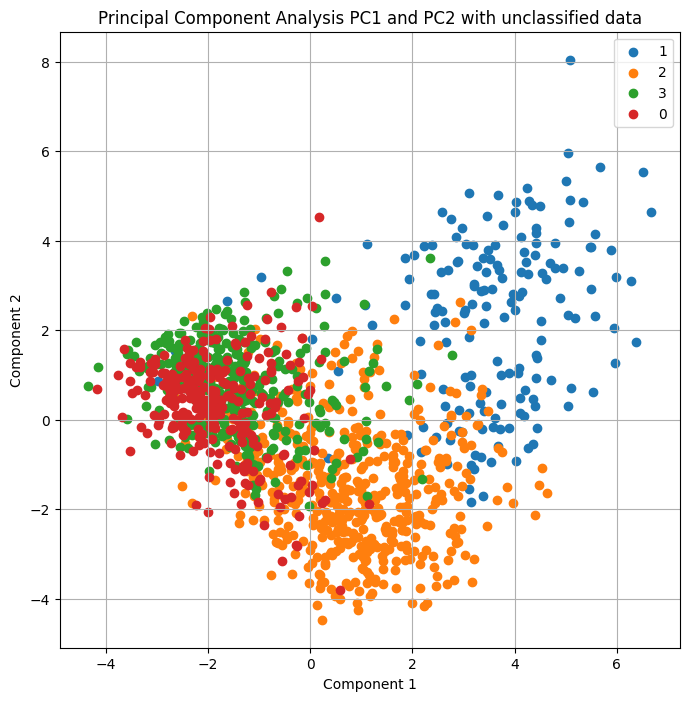

In [ ]:
features = df.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform PCA
pca = PCA()
pca.fit(df_scaled)
principal_components = pca.transform(df_scaled)

pc_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)])
pc_df['Class'] = cl
class_labels = pc_df['Class'].unique()

# Create a scatter plot
plt.figure(figsize=(8, 8))
for label in class_labels:
    subset = pc_df[pc_df['Class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis PC1 and PC2 with unclassified data')
plt.legend()
plt.grid(True)
plt.show()


#SEPARATE UNC=278

In [ ]:
data = df.join(cl)
# Print the concatenated DataFrame
data

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,...,15413,115,14684,15510,8671,4098,12917,4275,27869,label
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,...,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535,1
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,...,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840,1
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,...,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319,1
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,...,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701,2
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,...,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,...,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203,1
1306,7.5194,7.9761,15.0987,12.7311,10.7386,10.5480,10.2639,13.2170,9.0634,12.0775,...,7.9825,15.0999,11.9393,12.3584,15.4841,8.3209,10.1631,8.6265,12.2641,0
1307,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,...,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371,2
1308,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,...,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853,2


### work on unc test set

In [ ]:
unc = data[data['label'] == 0].copy()

data.drop(data[data['label'] == 0].index, inplace=True)

data.reset_index(drop=True, inplace=True)


In [ ]:
unc = unc.drop('label', axis=1)
unc

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
18,7.8612,10.7530,15.3691,11.7745,11.7912,13.8865,7.4960,13.3377,10.8423,11.1436,14.5150,9.4001,13.4642,11.4557,11.4306,14.8156,8.1377,13.2538,11.7538,10.4637
24,7.5410,11.2758,14.4737,11.1772,12.6420,9.5356,7.7755,12.9813,8.5763,8.7607,15.1654,7.6660,11.3115,10.8337,11.1626,12.6483,8.4251,11.7588,7.8886,12.0222
29,7.6100,8.3476,15.1745,12.1466,11.1848,11.8832,9.3867,13.3950,7.4339,8.6359,14.9262,8.8874,8.4182,11.6242,9.8899,12.8692,10.7816,11.3775,7.9099,8.7019
36,10.6964,8.6118,14.9840,11.6308,11.1586,9.5184,7.6186,13.9252,7.5299,8.3849,14.8770,9.2324,13.3144,7.8454,11.3109,14.2598,10.7226,12.5811,7.8435,9.6484
48,9.2205,9.7125,14.8608,12.4415,11.9220,7.6731,7.7189,13.2048,7.5950,8.1257,15.0053,8.3233,9.3690,10.1204,12.3121,12.1488,8.4108,12.2465,8.0565,10.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,9.8065,8.0016,13.6923,11.3359,11.7510,7.9980,9.2938,13.3436,9.8317,8.2266,14.9062,7.8619,13.1139,10.2106,13.1681,13.3574,8.1785,10.7058,7.9234,8.6144
1255,9.4556,8.5178,14.7912,13.1864,12.1985,7.8608,8.9514,13.7707,8.9895,8.4956,14.9651,7.7865,12.4085,9.7674,12.9425,10.5121,8.0011,10.9896,7.7726,10.4220
1262,11.9591,8.0095,14.1165,13.5478,11.5453,7.6854,7.4382,13.6044,12.9590,7.8967,13.3442,8.1817,14.1487,10.3525,12.8377,11.1903,9.2136,9.5692,9.0011,9.8996
1289,12.0908,7.8768,14.5337,13.6799,12.3166,7.5389,9.6418,13.7782,13.1233,9.2721,14.7078,7.5486,12.1092,9.9122,13.7548,11.7498,8.3507,11.4182,8.0996,10.1140


In [ ]:
unc = unc.reset_index(drop=True)
unc

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8612,10.7530,15.3691,11.7745,11.7912,13.8865,7.4960,13.3377,10.8423,11.1436,14.5150,9.4001,13.4642,11.4557,11.4306,14.8156,8.1377,13.2538,11.7538,10.4637
1,7.5410,11.2758,14.4737,11.1772,12.6420,9.5356,7.7755,12.9813,8.5763,8.7607,15.1654,7.6660,11.3115,10.8337,11.1626,12.6483,8.4251,11.7588,7.8886,12.0222
2,7.6100,8.3476,15.1745,12.1466,11.1848,11.8832,9.3867,13.3950,7.4339,8.6359,14.9262,8.8874,8.4182,11.6242,9.8899,12.8692,10.7816,11.3775,7.9099,8.7019
3,10.6964,8.6118,14.9840,11.6308,11.1586,9.5184,7.6186,13.9252,7.5299,8.3849,14.8770,9.2324,13.3144,7.8454,11.3109,14.2598,10.7226,12.5811,7.8435,9.6484
4,9.2205,9.7125,14.8608,12.4415,11.9220,7.6731,7.7189,13.2048,7.5950,8.1257,15.0053,8.3233,9.3690,10.1204,12.3121,12.1488,8.4108,12.2465,8.0565,10.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,9.8065,8.0016,13.6923,11.3359,11.7510,7.9980,9.2938,13.3436,9.8317,8.2266,14.9062,7.8619,13.1139,10.2106,13.1681,13.3574,8.1785,10.7058,7.9234,8.6144
274,9.4556,8.5178,14.7912,13.1864,12.1985,7.8608,8.9514,13.7707,8.9895,8.4956,14.9651,7.7865,12.4085,9.7674,12.9425,10.5121,8.0011,10.9896,7.7726,10.4220
275,11.9591,8.0095,14.1165,13.5478,11.5453,7.6854,7.4382,13.6044,12.9590,7.8967,13.3442,8.1817,14.1487,10.3525,12.8377,11.1903,9.2136,9.5692,9.0011,9.8996
276,12.0908,7.8768,14.5337,13.6799,12.3166,7.5389,9.6418,13.7782,13.1233,9.2721,14.7078,7.5486,12.1092,9.9122,13.7548,11.7498,8.3507,11.4182,8.0996,10.1140


###work on the rest of the data for the training

In [ ]:
cl = pd.DataFrame(data.pop('label'))
data

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,21472,15413,115,14684,15510,8671,4098,12917,4275,27869
0,7.8173,8.8478,7.7963,9.4090,10.2109,11.5292,10.7433,13.1667,14.4136,8.4945,13.2665,8.9750,15.4120,12.7007,10.0808,13.7751,7.7533,8.2505,7.7087,11.8535
1,7.5223,8.0882,10.9247,11.4597,12.8235,10.6179,11.1346,12.9337,10.9744,8.0018,12.7826,9.6934,15.6488,8.6953,10.6424,14.6517,10.1278,9.9876,7.5566,12.5840
2,13.4511,12.4915,14.7112,13.8775,8.7816,13.1811,7.5244,11.4362,13.3292,8.6985,13.8579,13.0504,10.5826,12.4558,9.9551,12.2465,10.0127,11.2952,11.3616,13.5319
3,10.6136,10.6898,15.2009,10.9524,10.9952,13.4788,7.7499,12.8050,11.5159,9.6271,14.8694,10.0817,11.6150,11.1765,10.2326,14.9393,9.0922,11.5620,10.9488,8.4701
4,7.7615,10.3979,15.3853,13.7512,12.4669,8.5731,8.7881,13.2030,7.3941,9.6847,14.8504,9.4682,12.3346,9.5564,11.7000,12.0387,7.8281,12.8423,7.9333,11.1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,13.1477,8.3171,14.7211,14.6026,11.5051,9.0234,8.4867,13.0634,12.2106,12.0311,14.1001,11.3413,13.5035,11.1022,10.4494,11.8254,9.3041,10.0648,7.8900,12.1394
1028,13.6291,9.3131,14.7045,14.5778,8.5001,9.3984,10.7989,10.9159,13.3821,8.3538,13.3141,11.4618,12.6695,12.8976,10.1691,11.0527,11.7741,8.8401,8.4424,12.6203
1029,12.7796,7.9969,14.9413,13.7715,10.8979,13.6237,9.4563,12.9753,12.7712,11.0600,14.6072,9.4656,14.1327,12.1704,11.8647,14.1251,10.3239,11.0105,13.0284,12.4371
1030,11.6336,8.0981,14.9724,13.8742,11.5005,13.0621,10.0873,12.6718,12.1486,9.1891,14.2247,9.8669,14.3377,12.2811,11.8469,13.8570,9.7560,10.6275,12.1898,12.2853


Principal Component Analysis WITHOUT UNC

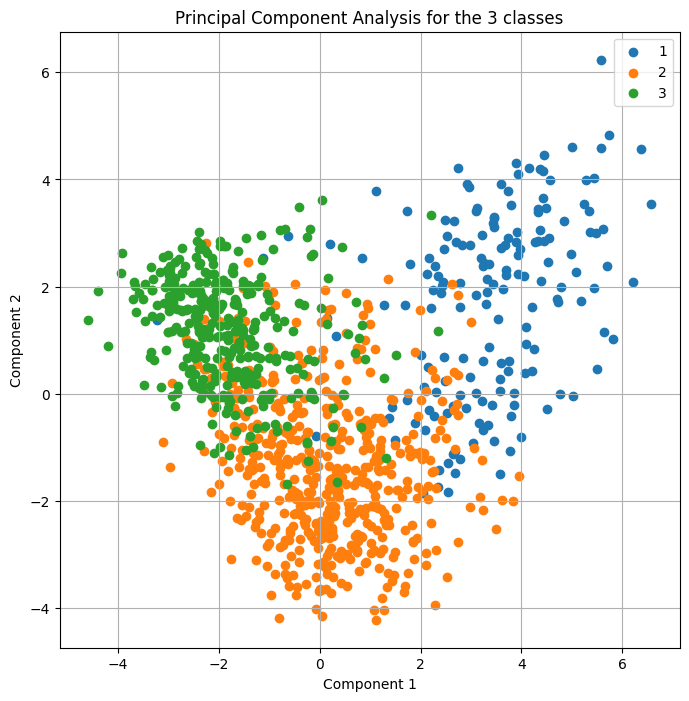

In [ ]:
features = data.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])

# Perform PCA
pca = PCA()
pca.fit(df_scaled)
principal_components = pca.transform(df_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)])
pc_df['Class'] = cl
class_labels = pc_df['Class'].unique()

# Create a scatter plot
plt.figure(figsize=(8, 8))
for label in class_labels:
    subset = pc_df[pc_df['Class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis for the 3 classes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cl

,label
0,1
1,1
2,1
3,2
4,2
...,...
1027,2
1028,1
1029,2
1030,2


In [ ]:
lb = cl.replace({1: 0, 2: 1,3:2})

In [ ]:
lb

,label
0,0
1,0
2,0
3,1
4,1
...,...
1027,1
1028,0
1029,1
1030,1


In [ ]:
counts = cl['label'].value_counts()
print(counts)

2    517
3    345
1    170
Name: label, dtype: int64


#XGboost Underlying Model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, lb, test_size=0.1, random_state=42)


Train and fit the model

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.65%


In [ ]:
#which class is predicted (131,)
print(y_pred)

[0 0 1 1 2 2 2 1 1 1 0 2 0 2 1 2 2 0 1 2 2 2 2 1 1 2 2 1 1 2 2 0 1 1 1 2 1
 0 2 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 2 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 0 2
 2 2 2 1 0 1 1 1 1 1 2 1 0 1 1 1 0 1 1 2 0 2 2 0 2 2 2 2 1 2]


Plot the prediction results

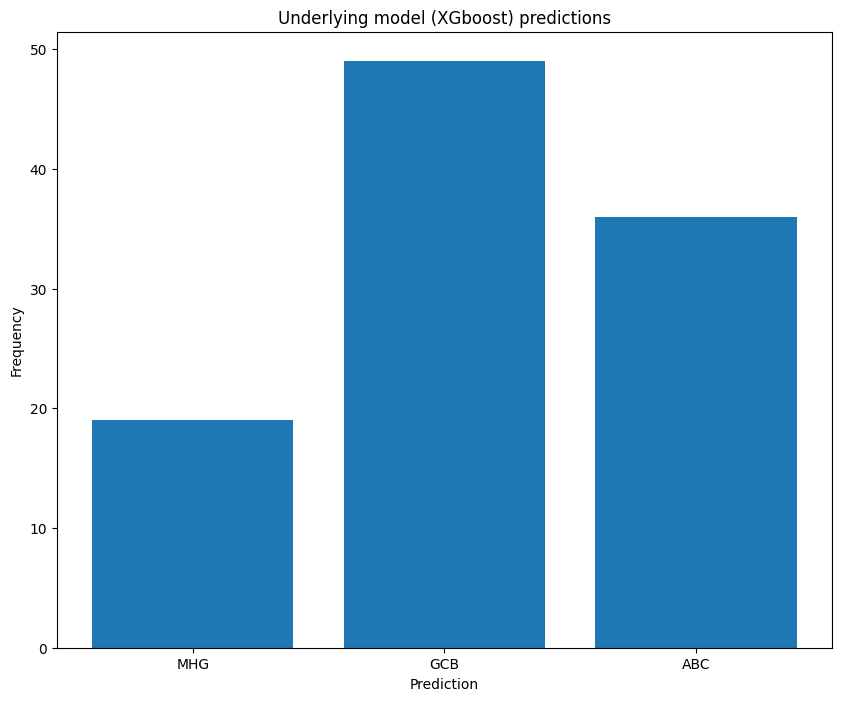

In [ ]:
num_MHG = np.sum(y_pred == 0)
num_GCB = np.sum(y_pred == 1)
num_ABC = np.sum(y_pred == 2)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(['MHG', 'GCB','ABC'], [num_MHG, num_GCB,num_ABC])#, color=['darkseagreen', 'darkseagreen'])
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Underlying model (XGboost) predictions')
plt.show()


In [ ]:
trueClass=y_test.values.ravel()
print(trueClass)

[0 0 2 1 2 2 2 2 1 1 0 2 0 1 1 2 2 1 1 2 2 1 2 1 1 2 2 0 1 2 2 0 1 1 1 2 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 2 1 1 1 0 1 1 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 0 2
 2 2 2 2 0 1 1 2 1 1 2 1 1 1 1 2 0 1 1 2 0 2 2 0 1 2 2 2 1 2]


In [ ]:
errors = sum(1 for x, y in zip(trueClass, y_pred) if x != y)

In [ ]:
differences_positions = [index for index, (x, y) in enumerate(zip(trueClass, y_pred)) if x != y]
print("Positions of differences:", differences_positions)

Positions of differences: [2, 7, 13, 17, 21, 27, 38, 39, 42, 50, 54, 56, 77, 81, 86, 89, 98]


In [ ]:
X_test_prob = model.predict_proba(X_test)
print(X_test_prob)

[[9.95661676e-01 4.30137943e-03 3.68868023e-05]
 [9.99909520e-01 2.59335357e-05 6.44693573e-05]
 [2.34596385e-03 7.93047190e-01 2.04606846e-01]
 [3.78893409e-03 9.93067741e-01 3.14336037e-03]
 [7.42100310e-05 2.80022481e-03 9.97125566e-01]
 [9.51111942e-05 6.79135846e-04 9.99225736e-01]
 [1.24835706e-05 5.00014685e-05 9.99937534e-01]
 [7.14257592e-04 8.00362945e-01 1.98922843e-01]
 [4.05055980e-05 9.99807894e-01 1.51589265e-04]
 [4.00733334e-05 9.98845100e-01 1.11477298e-03]
 [9.59570527e-01 3.23217288e-02 8.10768828e-03]
 [5.53872560e-05 1.45618129e-03 9.98488426e-01]
 [7.94269323e-01 3.93927097e-03 2.01791406e-01]
 [1.45456637e-04 4.38959032e-01 5.60895562e-01]
 [2.11576425e-05 9.99832511e-01 1.46200618e-04]
 [2.06581564e-04 1.12229604e-02 9.88570511e-01]
 [1.41785968e-05 1.63768316e-04 9.99822080e-01]
 [8.31706882e-01 1.68201074e-01 9.20705934e-05]
 [1.52895437e-03 9.70230520e-01 2.82405932e-02]
 [2.20371294e-03 1.15988161e-02 9.86197531e-01]
 [1.11021614e-03 1.03388391e-01 8.955014

##prediction of XGboost for the UNC

In [ ]:
unc_pred = model.predict(unc)
unc_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1], dtype=int32)

In [ ]:
unc_prob = model.predict_proba(unc)

# CONFORMAL PREDICTION TO ACHIVE 95% accuracy

##Evaluation functions

In [ ]:
def get_accuracy(prediction, real_class):
    correct = 0
    N = len(prediction)
    for i in range(0, N):
        if prediction[i][real_class[i]]:
            correct += 1
    return correct / N

In [ ]:
def get_oneC_avgC(prediction):
    arr = np.array(prediction)
    oneC = 0
    avgC = 0
    for i in range(0, len(arr)):
        # number of predicted lables
        num_predicted = arr[i].sum()
        avgC += num_predicted
        # is it a singleton?
        if num_predicted == 1:
            oneC += 1
        pass
    oneC /= len(arr)
    avgC /= len(arr)
    return oneC, avgC

## Let's start the inductive conformal classifier

In [ ]:
significance=0.05

Split the dataset into 3 parts: training, test, and calibration

test = 10% ( as before)
the rest 90% to:
train = 80%
calibration = 20%

The training and the test sets will be used in the same way as before: to train the predictive model and to evaluate its efficiency. We will use the calibration part to estimate when a particular label should be included in the final region prediction

In [ ]:
X_tr, X_cal, y_tr, y_cal = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('Test size:',X_test.shape)
print('Calibration size:',X_cal.shape)
print('Train size:',X_tr.shape)


Test size: (104, 20)
Calibration size: (186, 20)
Train size: (742, 20)


Fit the XGboost model on training set



In [ ]:
model.fit(X_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

Genetate predictions for the calibration set

In [ ]:
y_cal = y_cal.values.ravel()
predictions_cal = model.predict_proba(X_cal)
calib_conformal_vals = []
for i in range(0, len(X_cal)):
    cl = y_cal[i]
    calib_conformal_vals.append(predictions_cal[i][cl])

In [ ]:
predictions_cal[0:5]

array([[4.5697132e-05, 9.6715474e-01, 3.2799643e-02],
       [3.5561672e-05, 2.0785114e-02, 9.7917938e-01],
       [9.2541116e-01, 9.4707701e-03, 6.5118022e-02],
       [9.9732262e-01, 9.4699470e-04, 1.7304301e-03],
       [7.6372999e-05, 9.9990845e-01, 1.5151456e-05]], dtype=float32)

In [ ]:
y_cal[0:5]

array([1, 2, 0, 0, 1])

In [ ]:
calib_conformal_vals

[0.96715474,
 0.9791794,
 0.92541116,
 0.9973226,
 0.99990845,
 0.9817073,
 0.1108301,
 0.96865654,
 0.99994254,
 0.9949431,
 0.0032508841,
 0.9999466,
 0.9997929,
 0.9399651,
 0.9997124,
 0.9995258,
 0.8204425,
 0.9997706,
 0.6089184,
 0.99979466,
 0.8392933,
 0.9703992,
 0.6653251,
 0.9842886,
 0.99985087,
 0.99987066,
 0.389205,
 0.5326216,
 0.0016633872,
 0.99938047,
 0.99985194,
 0.9999825,
 0.030484898,
 0.38657552,
 0.99020433,
 0.99941504,
 0.99737203,
 0.8977815,
 0.99935704,
 0.9467511,
 0.9913052,
 0.99972624,
 0.9854753,
 0.99982125,
 0.99829954,
 0.16815788,
 0.99928063,
 0.99804485,
 0.99882466,
 0.9649608,
 0.9986029,
 0.99937385,
 0.9999502,
 0.9916414,
 0.9994281,
 0.999401,
 0.9984993,
 0.9998447,
 0.9998796,
 0.9998078,
 0.9471798,
 0.021006903,
 0.9793194,
 0.00043073157,
 0.100435205,
 0.113578215,
 0.99965453,
 0.999271,
 0.99668247,
 0.9978217,
 0.96761686,
 0.99994266,
 0.67074585,
 0.35622984,
 0.75300384,
 0.99990857,
 0.17493598,
 0.9986002,
 0.99964213,
 0.9

SORT and PLOT them

We will analyze how conformal every data point from the calibration set is (conformity function).

Text(0.5, 1.0, 'Distibution of conformity scores')

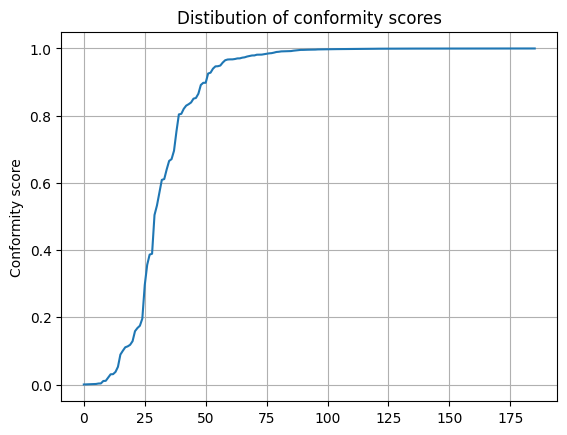

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
calib_conformal_vals = np.sort(calib_conformal_vals)
plt.plot(calib_conformal_vals)
plt.grid(True)
plt.ylabel('Conformity score')
plt.title('Distibution of conformity scores')

We will start with generating predictions for the test set:

In [ ]:
predictions_test = model.predict_proba(X_test)

#For the first patient

### Should we include class 1?

In [ ]:
print('Distribution of probabilities for the first datapoint in the test set:')
predictions_test[0]

Distribution of probabilities for the first datapoint in the test set:


array([9.8313361e-01, 1.6746510e-02, 1.1984918e-04], dtype=float32)

In [ ]:
rounded_num = round(1.0629896e-04, 4)
rounded_num

0.0001

Let  analyze the position of probability associated with class 0 in our distribution of conformity values:

Text(0.5, 1.0, 'Distribution of conformity scores')

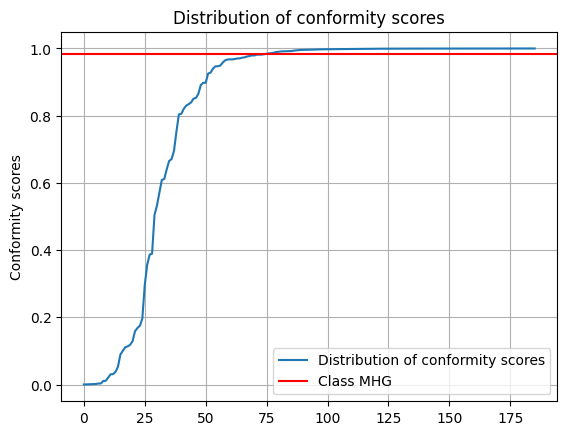

In [ ]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][0], color='r', linestyle='-')
plt.legend(['Distribution of conformity scores', 'Class ΜHG'])
plt.grid(True)
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [ ]:
val = sum(calib_conformal_vals <= predictions_test[0][0]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 76
Left side:    40.64%


In [ ]:
val = (sum(calib_conformal_vals > predictions_test[0][0]) + 1)
print('Right side (>): {}'.format(val))
print('Right hside:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 112
Right hside:   59.89%


 If we do not include the class label 1, then, the probability of making a mistake through this action is $45.99\%$.

It is higher than our allowed error rate $\epsilon = 5\%$. So we have to include this label.

### Should we include class 2?

Do the same for class 2.

In [ ]:
print('Probabilities for the first patient in the test set:')
predictions_test[0]

Probabilities for the first patient in the test set:


array([9.8313361e-01, 1.6746510e-02, 1.1984918e-04], dtype=float32)

Text(0.5, 1.0, 'Distribution of conformity scores')

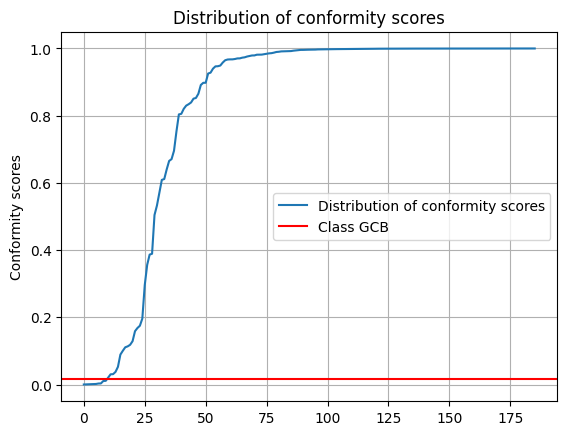

In [ ]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][1], color='r', linestyle='-')
plt.grid(True)
plt.legend(['Distribution of conformity scores', 'Class GCB'])
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [ ]:
val = sum(calib_conformal_vals <= predictions_test[0][1]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 11
Left side:    5.88%


In [ ]:
val = (sum(calib_conformal_vals > predictions_test[0][1]) + 1)
print('Right side (>): {}'.format(val))
print('Right side:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 177
Right side:   94.65%


If the class label 2 is not included in the region prediction, the probability of making a mistake is $4.81\%$. It is less than our allowed error rate $\epsilon = 5\%$. So we will not onclude class label 2.

### Should we include class 3?

Now, for class 3.

In [ ]:
print('Probabilities for the first patient in the test set:')
predictions_test[0]

Probabilities for the first patient in the test set:


array([9.8313361e-01, 1.6746510e-02, 1.1984918e-04], dtype=float32)

Text(0.5, 1.0, 'Distribution of conformity scores')

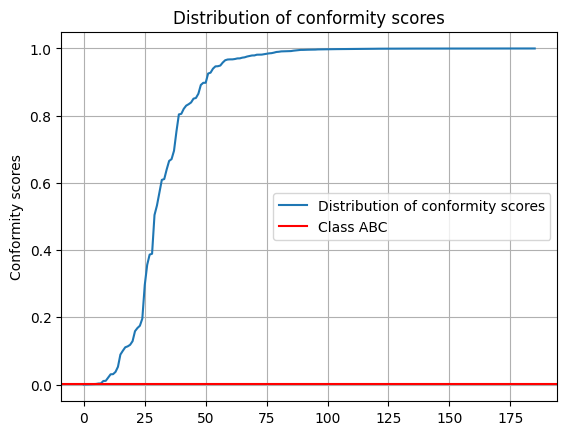

In [ ]:
plt.plot(calib_conformal_vals)
plt.axhline(y=predictions_test[0][2], color='r', linestyle='-')
plt.grid(True)
plt.legend(['Distribution of conformity scores', 'Class ABC'])
plt.ylabel('Conformity scores')
plt.title('Distribution of conformity scores')

In [ ]:
val = sum(calib_conformal_vals <= predictions_test[0][2]) + 1
print('Left side (<=): {}'.format(val))
print('Left side:    {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Left side (<=): 1
Left side:    0.53%


In [ ]:
val = (sum(calib_conformal_vals > predictions_test[0][2]) + 1)
print('Right side (>): {}'.format(val))
print('Right side:   {}%'.format(np.round(val / (len(calib_conformal_vals) + 1) * 100, 2)))

Right side (>): 187
Right side:   100.0%


Using the same reasoning, we should not include class 3

#  GENERALISE FOR THE WHOLE TEST SET

In [ ]:
Cp_vals_inverse = np.zeros((len(X_test), 3))
for i in range(0, len(X_test)):
    for j in range(0, 3):
        Cp_vals_inverse[i,j] = (sum(calib_conformal_vals <= predictions_test[i,j]) + 1) / (len(calib_conformal_vals) + 1)

For the whole test set :

In [ ]:
final_cp_prediction = Cp_vals_inverse > significance
final_cp_prediction

array([[ True,  True, False],
       [ True, False, False],
       [False,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [False,  True, False],
       [False,  True, False],
       [ True,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [False,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True,  True, False],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True,  True, False],
       [False,  True, False],
       [Fa

Plot the ICP results

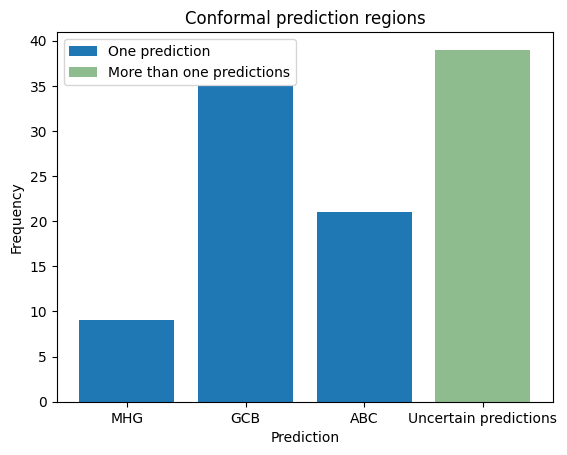

In [ ]:
d = pd.DataFrame(final_cp_prediction, columns=['MHG', 'GCB', 'ABC'])
filtered_df = d[d.sum(axis=1) == 1]
result = filtered_df.sum()
unc1 = len(d) - len(filtered_df)

# Plot the results
plt.bar(result.index, result.values, label='One prediction')
plt.bar(['Uncertain predictions'], [unc1], label='More than one predictions', color='darkseagreen')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.title('Conformal prediction regions')
plt.show()


In [ ]:
unc1

39

In [ ]:
result

MHG     9
GCB    35
ABC    21
dtype: int64

In [ ]:
interval_test=pd.DataFrame(final_cp_prediction)
interval_test

,0,1,2
0,True,True,False
1,True,False,False
2,False,True,True
3,False,True,False
4,False,False,True
...,...,...,...
99,False,True,True
100,False,False,True
101,False,False,True
102,False,True,False


Find rows with more than one True

In [ ]:
selected_indices = [index for index, row in interval_test.iterrows() if row.sum() > 1]

print("Indices of rows with more than one True:", selected_indices)

Indices of rows with more than one True: [0, 2, 7, 10, 12, 13, 17, 18, 19, 20, 25, 26, 27, 31, 35, 36, 43, 44, 47, 48, 50, 54, 56, 57, 60, 61, 67, 69, 72, 77, 82, 86, 89, 92, 93, 96, 97, 98, 99]


In [ ]:
common_count = sum(1 for num in selected_indices if num in differences_positions)
common_count

12

12 of the 17 wrong predictions of the basic algorithm were evaluated as uncertain by the conformal prediction

In [ ]:
count_2_true = 0
count_1_true = 0
count_3_true = 0

for row in final_cp_prediction:
    true_count = sum(row)
    if true_count == 2:
        count_2_true += 1
    elif true_count == 1:
        count_1_true += 1
    elif true_count == 3:
        count_3_true += 1

print("Occurrences with 2 True values in rows:", count_2_true)
print("Occurrences with 1 True value in rows:", count_1_true)
print("Occurrences with 3 True values in rows:", count_3_true)

Occurrences with 2 True values in rows: 31
Occurrences with 1 True value in rows: 65
Occurrences with 3 True values in rows: 8


matrix for the demosptation of the intervals

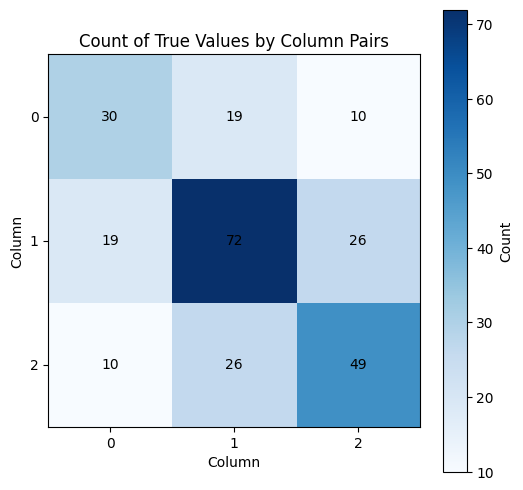

In [ ]:
new_df = interval_test.head(4)

def find_true_positions(row):
    return np.where(row)[0]

matrix = np.zeros((3, 3), dtype=int)

for _, row in interval_test.iterrows():
    true_positions = find_true_positions(row)

    for i in true_positions:
        for j in true_positions:
            matrix[i, j] += 1

# Plot the matrix as a heatmap with numbers
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='Blues')

# Display the numbers in the heatmap
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Count of True Values by Column Pairs')
plt.xticks(range(3))
plt.yticks(range(3))
plt.grid(False)
plt.show()



In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' with 104 rows and 3 columns

# Count the occurrences of rows with only one True value and the corresponding column index
counts = interval_test.eq(True).sum(axis=1)
column_indices = interval_test.eq(True).idxmax(axis=1)

# Create a new DataFrame to store the counts and column indices
result_df = pd.DataFrame({'Count': counts, 'Column Index': column_indices})

# Print the result DataFrame
print(result_df)



     Count  Column Index
0        2             0
1        1             0
2        2             1
3        1             1
4        1             2
..     ...           ...
99       2             1
100      1             2
101      1             2
102      1             1
103      1             2

[104 rows x 2 columns]


In [ ]:
count1 = result_df['Count'].value_counts()[1]

# Print the count
print("NUMBER OF SINGLE PREDICTIONS = ",count1)

NUMBER OF SINGLE PREDICTIONS =  65


In [ ]:
true_counts_test = interval_test.sum(axis=1)
true_counts_test = pd.DataFrame(true_counts_test)
true_counts_test

,0
0,2
1,1
2,2
3,1
4,1
...,...
99,2
100,1
101,1
102,1


###Evalluation of the result

SET SIZE : A wider spread is generally desirable, since it means that the
procedure is effectively distinguishing between easy and hard inputs.

In [ ]:
true_test_set_size=true_counts_test.value_counts()
true_test_set_size

1    65
2    31
3     8
dtype: int64

In [ ]:
acc = get_accuracy(final_cp_prediction, y_test.values.ravel())
oneC, avgC = get_oneC_avgC(final_cp_prediction)
print('Accuracy of the region predictor: {}%'.format(acc * 100))
print('Efficiency:\n\t oneC = {}\n\t avgC = {}'.format(oneC, avgC))

Accuracy of the region predictor: 95.1923076923077%
Efficiency:
	 oneC = 0.625
	 avgC = 1.4519230769230769


In [ ]:
# Calculate empirical coverage
empirical_coverage = final_cp_prediction[
    np.arange(final_cp_prediction.shape[0]), y_test.values.ravel()
].mean()
print(f"The empirical coverage is: {empirical_coverage*100}")

The empirical coverage is: 95.1923076923077


#About the unc test set

Make prediction for the UNC set

In [ ]:
predictions_unc = model.predict_proba(unc)

In [ ]:
Cp_unc = np.zeros((len(unc), 3))
for i in range(0, len(unc)):
    for j in range(0, 3):
        Cp_unc[i,j] = (sum(calib_conformal_vals <= predictions_unc[i,j]) + 1) / (len(calib_conformal_vals) + 1)

In [ ]:
final_cp_unc = Cp_unc > significance
final_cp_unc

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [False, False,  True],
       [False,  True, False],
       [ True,  True,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True, False],
       [False,  True,  True],
       [Fa

Plot the results

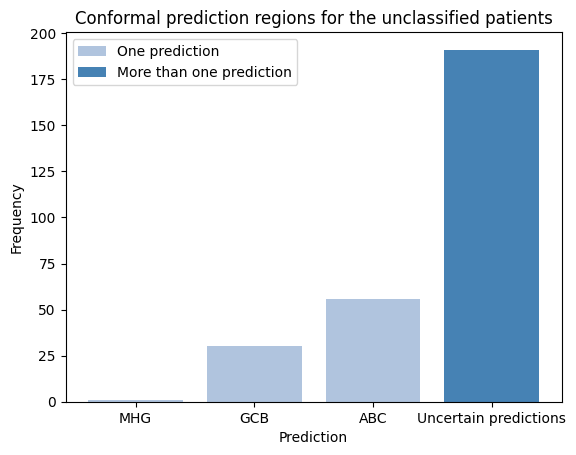

In [ ]:
du = pd.DataFrame(final_cp_unc, columns=['MHG', 'GCB', 'ABC'])

filtered = du[du.sum(axis=1) == 1]
resultu = filtered.sum()

unc2 = len(du) - len(filtered)

# Plot the results
plt.bar(resultu.index, resultu.values, label='One prediction',color='lightsteelblue')
plt.bar(['Uncertain predictions'], [unc2], label='More than one prediction', color='steelblue')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.title('Conformal prediction regions for the unclassified patients')
plt.show()


In [ ]:
count_2_u = 0
count_1_u = 0
count_3_u = 0

for row in final_cp_unc:
    true_count1 = sum(row)
    if true_count1 == 2:
        count_2_u += 1
    elif true_count1 == 1:
        count_1_u += 1
    elif true_count1 == 3:
        count_3_u += 1

print("Occurrences with 2 True values in rows:", count_2_u)
print("Occurrences with 1 True value in rows:", count_1_u)
print("Occurrences with 3 True values in rows:", count_3_u)

Occurrences with 2 True values in rows: 142
Occurrences with 1 True value in rows: 87
Occurrences with 3 True values in rows: 49


In [ ]:
interval=pd.DataFrame(final_cp_unc)
interval

,0,1,2
0,False,True,False
1,True,True,True
2,False,True,True
3,False,True,True
4,True,True,True
...,...,...,...
273,True,True,True
274,False,False,True
275,True,True,True
276,False,False,True


check how the conformal works on the unc set

In [ ]:
oneCunc, avgCunc = get_oneC_avgC(interval)
print( oneCunc, avgCunc)

0.3129496402877698 1.8633093525179856


#VALIDATION SET

In [ ]:
uploaded = files.upload()
validation_data = pd.read_csv('validation_labels_full.csv')


Saving validation_labels_full.csv to validation_labels_full.csv


In [ ]:
val = validation_data.drop(columns='Unnamed: 0')

In [ ]:
unc_val = val[val['label'] == 'UNC'].copy()

val.drop(val[val['label'] == 'UNC'].index, inplace=True)

val.reset_index(drop=True, inplace=True)

In [ ]:
val

,16351,5562,7797,22416,26648,25671,19758,24931,3522,13759,...,15413,115,14684,15510,8671,4098,12917,4275,27869,label
0,9.458619,9.711037,14.683870,14.306765,11.727379,8.513276,9.577592,13.123999,9.892485,8.370188,...,7.679624,12.296407,12.865888,13.345504,10.853857,7.848581,11.032240,7.763745,11.261028,ABC
1,12.510236,10.143769,14.518585,12.925640,11.394207,13.627443,9.526864,12.877390,12.567820,11.034370,...,10.535742,13.764049,13.017554,13.614177,12.466886,8.008343,11.407916,13.162092,10.342331,GCB
2,11.367318,9.428788,14.601103,11.794268,11.351934,14.398492,10.501675,12.721682,12.314985,8.486956,...,11.644496,13.585279,13.946069,12.086329,12.715447,7.891779,9.969699,12.913606,11.581533,GCB
3,9.027778,10.567104,14.873166,14.841160,12.006766,7.604193,9.476341,13.383284,8.628864,8.138957,...,9.572771,11.163334,10.378715,13.476123,12.531221,8.956459,12.029843,8.015355,11.756301,ABC
4,13.407085,11.639531,14.601103,12.789673,12.322997,14.003021,8.594423,12.940442,13.458736,8.586615,...,13.016867,13.992554,12.983702,11.642945,12.044746,9.447871,10.329715,13.516172,12.814568,MHG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9.620927,10.864565,14.305550,14.167520,11.248599,13.793379,10.563018,13.145965,11.239871,10.972904,...,9.493763,14.022744,13.502352,13.918902,14.091828,11.529084,10.937368,13.380992,11.947772,GCB
796,11.652571,9.852617,14.695341,12.934362,11.040943,13.914590,9.429765,12.844657,12.045693,11.013555,...,11.038632,13.559453,12.990430,13.007333,13.149460,10.361368,10.505269,13.029792,11.952129,MHG
797,11.607076,9.915563,15.200872,12.516673,11.091768,14.987154,9.705403,12.473375,11.560772,10.870983,...,10.752732,13.085874,13.359282,12.030796,13.143154,7.914761,10.509688,14.701149,11.745075,GCB
798,7.564030,7.899377,14.704452,14.857964,12.087929,10.888700,10.373444,13.259241,8.749410,8.055498,...,9.719692,11.993529,10.923500,13.433816,8.326614,8.702310,12.264142,9.013330,10.774923,ABC


In [ ]:
val_target= pd.DataFrame(val.pop('label'))

In [ ]:
val_target.value_counts()

label
GCB      468
ABC      249
MHG       83
dtype: int64

##validation_conformal

In [ ]:
val.rename(columns={'21759': '21472'}, inplace=True)


In [ ]:
val_target = val_target.replace({'MHG': 0, 'GCB':1, 'ABC':2})

In [ ]:
y_pred_val = model.predict(val)

In [ ]:
y_pred_val

array([2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,

In [ ]:
predictions_val_test = model.predict_proba(val)

In [ ]:
predictions_val_test

array([[4.6926296e-05, 2.3943179e-03, 9.9755871e-01],
       [8.4125390e-04, 9.9896383e-01, 1.9493249e-04],
       [6.4714980e-01, 3.4499231e-01, 7.8579141e-03],
       ...,
       [1.4704003e-03, 9.9838865e-01, 1.4089311e-04],
       [3.9696653e-05, 3.5272777e-05, 9.9992502e-01],
       [9.7356784e-01, 2.5978833e-02, 4.5328136e-04]], dtype=float32)

In [ ]:
accuracy_val = accuracy_score(val_target, y_pred_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.65%


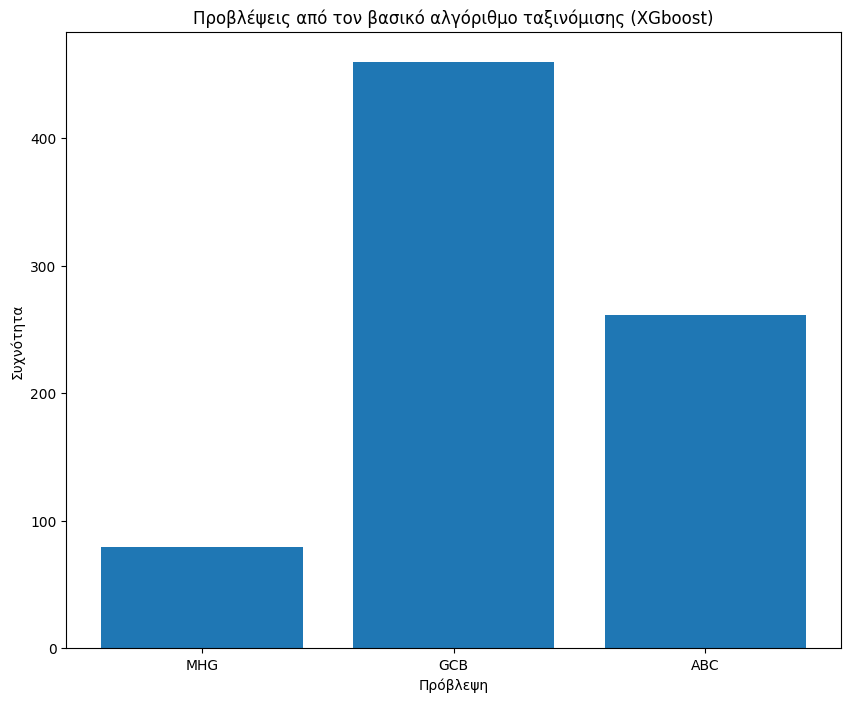

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_MHG_val = np.sum(y_pred_val == 0)
num_GCB_val = np.sum(y_pred_val == 1)
num_ABC_val = np.sum(y_pred_val == 2)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.bar(['MHG', 'GCB','ABC'], [num_MHG_val, num_GCB_val,num_ABC_val])#, color=['darkseagreen', 'darkseagreen'])
plt.xlabel('Πρόβλεψη')
plt.ylabel('Συχνότητα')
plt.title('Προβλέψεις από τον βασικό αλγόριθμο ταξινόμισης (XGboost)')
plt.show()

cp

In [ ]:
Cp_vals_inverse_val = np.zeros((len(val), 3))
for i in range(0, len(val)):
    for j in range(0, 3):
        Cp_vals_inverse_val[i,j] = (sum(calib_conformal_vals <= predictions_val_test[i,j]) + 1) / (len(calib_conformal_vals) + 1)

In [ ]:
final_cp_val_prediction = Cp_vals_inverse_val > significance
final_cp_val_prediction

array([[False, False,  True],
       [False,  True, False],
       [ True,  True, False],
       ...,
       [False,  True, False],
       [False, False,  True],
       [ True,  True, False]])

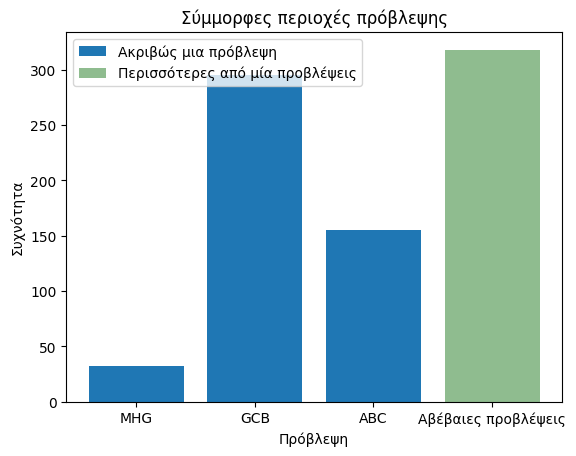

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
d_val = pd.DataFrame(final_cp_val_prediction, columns=['MHG', 'GCB', 'ABC'])

# Count True values in each column where there's exactly one True in the row
filtered_df_val = d_val[d_val.sum(axis=1) == 1]
result_val = filtered_df_val.sum()

# Count instances where there are more than one True in rows
unc1_val = len(d_val) - len(filtered_df_val)

# Plot the results
plt.bar(result_val.index, result_val.values, label='Ακριβώς μια πρόβλεψη')
plt.bar(['Αβέβαιες προβλέψεις'], [unc1_val], label='Περισσότερες από μία προβλέψεις', color='darkseagreen')
plt.xlabel('Πρόβλεψη')
plt.ylabel('Συχνότητα')
plt.legend()
plt.title('Σύμμορφες περιοχές πρόβλεψης')
plt.show()

In [ ]:
result_val


MHG     32
GCB    295
ABC    155
dtype: int64

In [ ]:
interval_test_val=pd.DataFrame(final_cp_val_prediction)
interval_test_val

,0,1,2
0,False,False,True
1,False,True,False
2,True,True,False
3,False,False,True
4,True,True,False
...,...,...,...
795,True,True,False
796,False,True,False
797,False,True,False
798,False,False,True


In [ ]:
trueClass=val_target.values.ravel()
print(trueClass)

[2 1 1 2 0 1 2 0 1 2 1 1 0 1 1 2 1 0 1 2 1 2 0 0 1 1 1 1 1 1 1 2 0 1 1 1 2
 1 1 1 1 1 2 2 1 1 2 1 0 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 2 2 1 1 1 1 0 1 1 1
 1 2 2 2 1 1 0 1 1 1 1 1 0 2 1 1 1 0 2 1 2 2 1 1 1 1 1 2 1 0 2 2 1 0 0 0 2
 1 0 1 1 1 1 1 2 1 0 2 2 1 1 1 2 1 0 1 1 2 2 1 1 2 2 1 1 1 1 2 0 1 2 0 1 0
 1 2 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 1 2 1 1 1 2 1 0 1 1 1 1 1 0 1 1 1 2
 1 1 1 0 1 1 1 2 1 0 2 2 0 0 2 1 2 2 1 2 1 1 1 0 2 2 1 1 1 1 2 2 1 1 1 1 1
 1 2 2 1 1 1 1 2 2 2 1 1 1 1 2 2 0 1 2 1 1 1 1 1 2 2 1 0 2 1 1 0 1 1 1 1 2
 1 1 0 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 1 2 2 2 1 1 1 2 1 2
 2 2 1 2 1 1 2 1 1 1 1 2 2 2 1 1 2 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 0 1 2 2 1
 1 0 2 1 1 2 1 1 2 2 0 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 0 1 2 2 2 2 1 1 1 1 1
 2 1 1 1 2 2 2 1 1 1 1 2 1 1 1 0 2 1 1 2 2 1 1 1 2 1 2 2 2 1 2 2 1 2 2 2 1
 1 1 1 1 1 2 2 0 1 1 1 1 2 1 0 0 1 1 1 2 0 2 2 1 2 1 1 1 0 1 1 0 1 1 1 1 2
 1 2 2 1 1 2 1 2 2 1 1 1 1 1 2 0 1 0 1 1 2 2 0 2 1 1 2 1 2 1 1 1 1 1 2 1 2
 1 2 1 2 2 1 1 1 2 1 1 1 

In [ ]:
errors = sum(1 for x, y in zip(trueClass, y_pred_val) if x != y)

In [ ]:
differences_positions_val = [index for index, (x, y) in enumerate(zip(trueClass, y_pred_val)) if x != y]
print("Positions of differences:", differences_positions_val)

Positions of differences: [2, 4, 7, 12, 18, 22, 25, 35, 44, 59, 61, 70, 71, 82, 86, 98, 105, 114, 115, 120, 123, 128, 169, 170, 174, 176, 181, 191, 194, 197, 199, 208, 210, 216, 217, 218, 219, 224, 229, 232, 233, 238, 241, 243, 244, 257, 258, 275, 279, 282, 285, 315, 325, 330, 343, 346, 353, 360, 386, 390, 391, 392, 402, 406, 407, 411, 412, 416, 419, 421, 426, 438, 453, 454, 455, 456, 461, 464, 471, 476, 487, 490, 505, 506, 510, 511, 513, 523, 526, 532, 534, 565, 566, 572, 577, 584, 592, 595, 603, 619, 621, 622, 624, 636, 639, 643, 646, 651, 653, 655, 656, 661, 668, 675, 677, 678, 680, 683, 684, 685, 707, 729, 732, 735, 744, 748, 752, 761, 762, 769, 772, 773, 784, 789, 796, 799]


In [ ]:
# Find rows with more than one True
selected_indices_val = [index for index, row in interval_test_val.iterrows() if row.sum() > 1]

print("Indices of rows with more than one True:", selected_indices_val)

Indices of rows with more than one True: [2, 4, 5, 7, 10, 12, 15, 17, 18, 22, 25, 28, 44, 45, 47, 61, 67, 70, 71, 74, 77, 80, 82, 84, 86, 87, 89, 92, 98, 102, 103, 104, 105, 114, 119, 120, 123, 128, 130, 132, 138, 139, 140, 141, 142, 144, 147, 150, 152, 159, 160, 161, 164, 169, 170, 173, 174, 176, 177, 178, 180, 182, 183, 185, 188, 191, 197, 199, 204, 207, 209, 210, 216, 217, 222, 224, 227, 229, 230, 231, 232, 233, 238, 240, 244, 245, 246, 248, 250, 252, 253, 255, 257, 258, 266, 269, 272, 273, 274, 275, 276, 279, 281, 282, 283, 285, 288, 291, 296, 297, 298, 301, 302, 305, 307, 312, 314, 315, 318, 322, 323, 324, 325, 326, 327, 330, 331, 332, 333, 334, 335, 338, 340, 341, 342, 344, 346, 348, 349, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 366, 373, 374, 378, 382, 386, 388, 390, 391, 393, 395, 396, 402, 403, 405, 406, 407, 411, 412, 414, 416, 418, 419, 421, 423, 426, 427, 431, 434, 438, 439, 441, 442, 444, 445, 447, 449, 452, 453, 454, 456, 458, 460, 461, 464, 467, 471, 473, 476, 4

In [ ]:
common_count_val = sum(1 for num in selected_indices_val if num in differences_positions_val)
common_count_val

112

In [ ]:
# Initialize counters for each case
count_2_true = 0
count_1_true = 0
count_3_true = 0

# Iterate through the data to count occurrences
for row in final_cp_val_prediction:
    true_count = sum(row)
    if true_count == 2:
        count_2_true += 1
    elif true_count == 1:
        count_1_true += 1
    elif true_count == 3:
        count_3_true += 1

print("Occurrences with 2 True values in rows:", count_2_true)
print("Occurrences with 1 True value in rows:", count_1_true)
print("Occurrences with 3 True values in rows:", count_3_true)

Occurrences with 2 True values in rows: 241
Occurrences with 1 True value in rows: 482
Occurrences with 3 True values in rows: 77


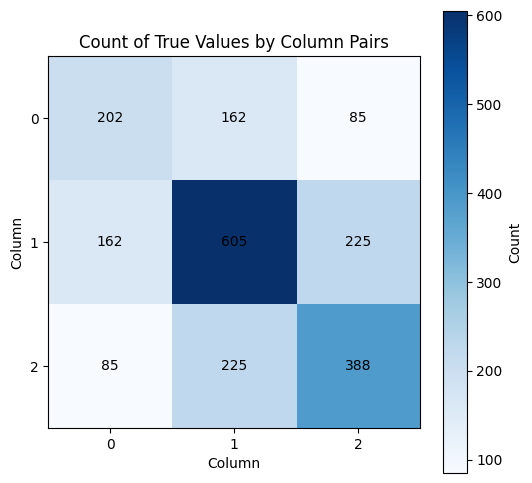

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
new_df = interval_test_val.head(4)
# Assuming your DataFrame is called 'df' with 3 columns and 104 rows

# Define a custom function to identify the positions of True values in a row
def find_true_positions(row):
    return np.where(row)[0]

# Create an empty matrix to store the counts
matrix = np.zeros((3, 3), dtype=int)

# Iterate over the rows of the DataFrame
for _, row in interval_test_val.iterrows():     #####################################
    true_positions = find_true_positions(row)

    # Increment the count in the matrix for each pair of true positions
    for i in true_positions:
        for j in true_positions:
            matrix[i, j] += 1

# Plot the matrix as a heatmap with numbers
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='Blues')

# Display the numbers in the heatmap
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Count of True Values by Column Pairs')
plt.xticks(range(3))
plt.yticks(range(3))
plt.grid(False)
plt.show()



In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' with 104 rows and 3 columns

# Count the occurrences of rows with only one True value and the corresponding column index
counts = interval_test_val.eq(True).sum(axis=1)
column_indices = interval_test_val.eq(True).idxmax(axis=1)

# Create a new DataFrame to store the counts and column indices
result_df = pd.DataFrame({'Count': counts, 'Column Index': column_indices})

# Print the result DataFrame
print(result_df)



     Count  Column Index
0        1             2
1        1             1
2        2             0
3        1             2
4        2             0
..     ...           ...
795      2             0
796      1             1
797      1             1
798      1             2
799      2             0

[800 rows x 2 columns]


In [ ]:
count1 = result_df['Count'].value_counts()[1]

# Print the count
print("NUMBER OF SINGLE PREDICTIONS = ",count1)

NUMBER OF SINGLE PREDICTIONS =  482


In [ ]:
true_counts_test_val = interval_test_val.sum(axis=1)
true_counts_test_val = pd.DataFrame(true_counts_test_val)
true_counts_test_val

,0
0,1
1,1
2,2
3,1
4,2
...,...
795,2
796,1
797,1
798,1


In [ ]:
true_test_set_size_val=true_counts_test_val.value_counts()
true_test_set_size_val

1    482
2    241
3     77
dtype: int64

In [ ]:
acc = get_accuracy(final_cp_val_prediction, val_target.values.ravel())
oneC, avgC = get_oneC_avgC(final_cp_val_prediction)
print('Accuracy of the region predictor: {}%'.format(acc * 100))
print('Efficiency:\n\t oneC = {}\n\t avgC = {}'.format(oneC, avgC))

Accuracy of the region predictor: 96.625%
Efficiency:
	 oneC = 0.6025
	 avgC = 1.49375


In [ ]:
# Calculate empirical coverage
empirical_coverage_val = final_cp_val_prediction[
    np.arange(final_cp_val_prediction.shape[0]), val_target.values.ravel()
].mean()
print(f"The empirical coverage is: {empirical_coverage_val*100}")

The empirical coverage is: 96.625
